In [1]:
import os
import sys
sys.path.append("/Users/smsharma/heptools/ares/")
sys.path.append("/Users/smsharma/heptools/")

os.environ["ARES"] = "/Users/smsharma/heptools/ares"

import ares
from matplotlib import pylab
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

# WARNING: ARES not fully emcee version >= 3 compatible!
#          emcee 2.2.1 is a safe bet for now.


In [24]:
import os, sys
import copy
sys.path.append("../")
sys.path.append("../../twentyone-global/")

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.lines import Line2D
import matplotlib
from scipy.interpolate import interp1d
from tqdm import *

from twentyone.twentyone import TwentyOne, TwentyOneSolver
from twentyone.units import *

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from plot_params import params
pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [26]:
to = TwentyOne(z_min=10., z_max=500., f_star_L=0.03, f_star_X=0.03, T_vir_cut=2e4 * Kelv)

In [105]:
z_max = 400.
z_min = 11.
z_21_ary = np.logspace(np.log10(z_min), np.log10(z_max), 1000)[:: -1]

In [106]:
T_gamma_SM = lambda z: to.T_CMB(z)
to_SM_solve = TwentyOneSolver(T_gamma=T_gamma_SM, to=to, z_ary=z_21_ary)
to_SM_solve.solve()

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 794
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([400.        , 398.56371824, 397.13259375, 395.70660801,
       394.28574255, 392.86997901, 391.45929905, 390.05368443,
       388.65311695, 387.2575785 , 385.86705101, 384.4815165 ,
       383.10095703, 381.72535474, 380.35469183, 378.98895057,
       377.62811329, 376.27216236, 374.92108026, 373.57484949,
       372.23345264, 370.89687235, 369.56509132, 368.23809232,
       366.91585819, 365.59837181, 364.28561613, 362.97757417,
       361.674229  , 360.37556376, 359.08156164, 357.7922059 ,
       356.50747986, 355.22736689, 353.95185042, 352.68091396,
       351.41454105, 350.15271532, 348.89542043, 347.64264011,
       346.39435816, 345.15055841, 343.91122479, 342.67634125,
       341.4458918 , 340.21986054, 338.9982316 , 337.78098916,
       336.56811748, 335.35960086, 334.15542367, 332.95557032,
  

In [30]:
# fig, ax = plt.subplots()

# plt.plot(1 + to_SM_solve.z_ary, to_SM_solve.delta_T_b_ary, label='Standard Model', color='k', alpha=0.5, ls='--')

# plt.xlabel("$1 + z$")
# plt.ylabel("$\Delta T_{\mathrm b}\,\mathrm{[K]}$")
# plt.title(r"\bf{21-cm absorption temperature}")

# plt.legend(loc='lower right', handlelength=1.3)

# plt.xlim(np.min(1 + to_SM_solve.z_ary), np.max(1 + to_SM_solve.z_ary))
# plt.ylim(-0.3, 0.1)

# plt.xscale("log")

# plt.tight_layout()



In [97]:
pars = \
{
 'problem_type': 100,              # Blank slate global 21-cm signal calculation

 # Setup star formation
 'pop_Tmin{0}': 2e4,               # atomic cooling halos
 'pop_fstar{0}': 3e-2,             # 10% star formation efficiency

 # Setup UV emission
 'pop_sed_model{0}': True,
 'pop_sed{0}': 'bb',               # PopII stars -> 10^4 K blackbodies
 'pop_temperature{0}': 1e4,
 'pop_rad_yield{0}': 1e42,
 'pop_fesc{0}': 1.0,
 'pop_Emin{0}': 10.19,
 'pop_Emax{0}': 24.6,
 'pop_EminNorm{0}': 13.6,
 'pop_EmaxNorm{0}': 24.6,
 'pop_lya_src{0}': True,
 'pop_ion_src_cgm{0}': False,
 'pop_heat_src_igm{0}': False,

 # Setup X-ray emission
 'pop_sed{1}': 'pl',
 'pop_alpha{1}': -1.5,
 'pop_rad_yield{1}': 2.6e39,
 'pop_Emin{1}': 2e2,
 'pop_Emax{1}': 3e4,
 'pop_EminNorm{1}': 5e2,
 'pop_EmaxNorm{1}': 8e3,

 'pop_lya_src{1}': False,
 'pop_ion_src_cgm{1}': False,
 'pop_heat_src_igm{1}': True,
}

sim = ares.simulations.Global21cm(**pars)

# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

##############################################################################################################
####                                      ARES Simulation: Overview                                       ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Uniform Backgrounds                                                                                  ####
#### ---------------------------------------------------------------------------------------------------- ####
####               sfrd      sed    radio    O/IR    Ly-a     LW     Ly-C   X-ray    RTE                  ####
#### pop #0  :    fcoll      yes                      x       x                                           ####
#### pop #1  :    fcoll      yes            

In [98]:
sim.run()

# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.
# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.


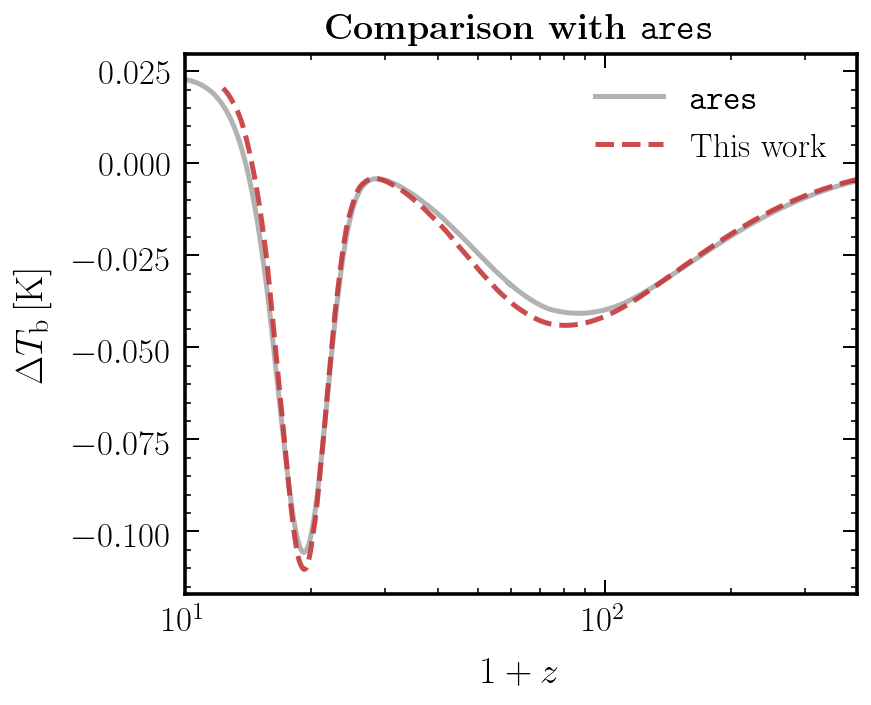

In [114]:
plt.plot(sim.history['z'], sim.history['dTb'] / 1000., label=r'\texttt{ares}', color='k', alpha=0.3)
plt.plot(1 + to_SM_solve.z_ary, to_SM_solve.delta_T_b_ary, label="This work", ls='--')

plt.xscale("log")
plt.xlim(10, 400)
plt.xlabel("$1 + z$")
plt.ylabel("$\Delta T_{\mathrm b}\,\mathrm{[K]}$")
plt.title(r"\bf{Comparison with \texttt{ares}}")

plt.legend()

plt.tight_layout()
plt.savefig("/Users/smsharma/Desktop/ares_comparison.pdf")

In [34]:
pars = ares.util.ParameterBundle('pop:fcoll')
pars

{'pop_sfr_model': 'fcoll', 'pop_Tmin': 10000.0, 'pop_Tmax': None}

In [8]:
pop = ares.populations.GalaxyPopulation(**pars)

In [9]:
from ares.physics.Constants import rhodot_cgs

z_test = 10

In [10]:
pop.dfcolldt(z_test)

# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.


3.8204691006774635e-18

In [11]:
pop.cosm.rho_b_z0 * pop.dfcolldt(z_test) * rhodot_cgs

0.748727082235617

In [12]:
pop.SFRD(z_test) * rhodot_cgs

0.07487270822356171

In [13]:
mgb = ares.simulations.MetaGalacticBackground(**pars)
mgb.run()
z, E, flux = mgb.get_history(flatten=True)


TypeError: 'NoneType' object is not subscriptable

## misc

In [11]:
import ares
from ares.physics.Constants import rhodot_cgs

In [12]:
pars = \
{
 'problem_type': 100,

 # Setup star formation
 'pop_Mmin': 1e6,   
 'pop_fstar': 1.,     
}

pop = ares.populations.GalaxyPopulation(**pars)

In [13]:
z = 6.
pop.SFRD(z) * rhodot_cgs

# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.


1.4239538975793693